# Intro
My data analysis will predict whether the Titanic passenger survived the shipwreck or not

# Import

In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")

In [47]:
train = pd.read_csv("/Users/tgut03/Jupyter/Data/Titanic Train.csv")
test = pd.read_csv("/Users/tgut03/Jupyter/Data/Titanic Test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Key Insights
- If the Survived column equals 1 then true else false

In [48]:
trainInfo = pd.DataFrame()
trainInfo["Type"] = train.dtypes
trainInfo["Nulls"] = train.isnull().sum()
trainInfo["Uniques"] = train.nunique()
print(trainInfo)
print(train.shape)

                Type  Nulls  Uniques
PassengerId    int64      0      891
Survived       int64      0        2
Pclass         int64      0        3
Name          object      0      891
Sex           object      0        2
Age          float64    177       88
SibSp          int64      0        7
Parch          int64      0        7
Ticket        object      0      681
Fare         float64      0      248
Cabin         object    687      147
Embarked      object      2        3
(891, 12)


In [49]:
testInfo = pd.DataFrame()
testInfo["Type"] = test.dtypes
testInfo["Nulls"] = test.isnull().sum()
testInfo["Uniques"] = test.nunique()
print(testInfo)
print(test.shape)

                Type  Nulls  Uniques
PassengerId    int64      0      418
Pclass         int64      0        3
Name          object      0      418
Sex           object      0        2
Age          float64     86       79
SibSp          int64      0        7
Parch          int64      0        8
Ticket        object      0      363
Fare         float64      1      169
Cabin         object    327       76
Embarked      object      0        3
(418, 11)


# Explore

In [50]:
# Summary Stats
train.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


Key Insights
- approximately 38% of passengers survived
- the average demographic was single, lower class, middle aged, males
- the median cost of fare was \\$14

In [51]:
# Frequency Function
def freq(col) : 
    x = train[col]
    freq = x.value_counts()
    relFreq = x.value_counts() / len(x)
    relFreq = round(relFreq, 2)
    y = pd.concat([freq, relFreq], axis = 1)
    return y

In [52]:
# Survival Frequency
freq("Survived")

,Survived,Survived
0,549,0.62
1,342,0.38


In [53]:
# Ticket Class Frequency
freq("Pclass")

,Pclass,Pclass
3,491,0.55
1,216,0.24
2,184,0.21


In [54]:
# Sex Frequency
freq("Sex")

,Sex,Sex
male,577,0.65
female,314,0.35


In [55]:
# Siblings Or Spouse Frequency
freq("SibSp")

,SibSp,SibSp
0,608,0.68
1,209,0.23
2,28,0.03
4,18,0.02
3,16,0.02
8,7,0.01
5,5,0.01


In [56]:
# Parents Or Children Frequency
freq("Parch")

,Parch,Parch
0,678,0.76
1,118,0.13
2,80,0.09
5,5,0.01
3,5,0.01
4,4,0.00
6,1,0.00


In [57]:
# Embark Frequency
freq("Embarked")

,Embarked,Embarked
S,644,0.72
C,168,0.19
Q,77,0.09


Key Insights
- passengers not survived > passengers survived
- 3rd class passengers had the highest frequency
- male passengers had 30% higher frequency than female passengers
- passengers with 0 family had the highest frequency
- southampton passengers had 53% higher frequency than cherbourg passengers

In [58]:
# Bar Function
def bar(col) : 
    sns.countplot(data = train, x = col, hue = "Survived")
    plt.title(f"Count Of {col} By Survived")
    plt.show()
    surv = train.groupby(col)[["Survived"]].mean()
    return surv

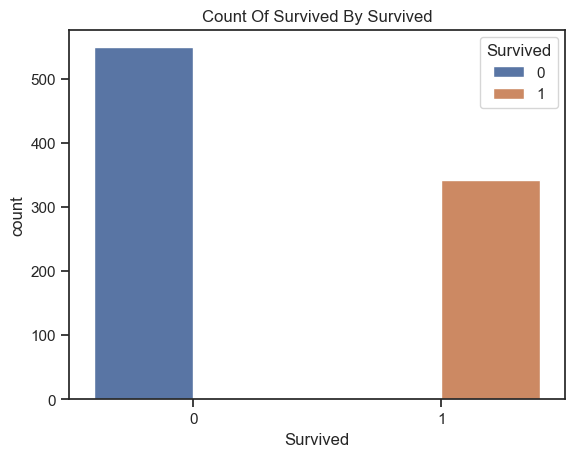

,Survived
Survived,
0,0.0
1,1.0


In [59]:
# Survival Bar
bar("Survived")

Key Insights
- more passengers not survived than survived

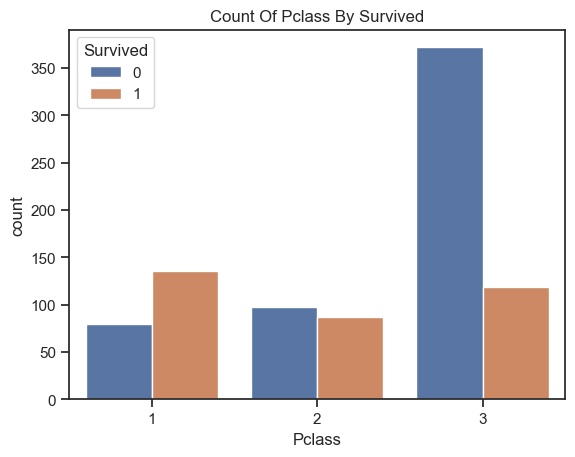

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [60]:
# Ticket Class Bar
bar("Pclass")

Key Insights
- on average 1st class had the most survived passengers

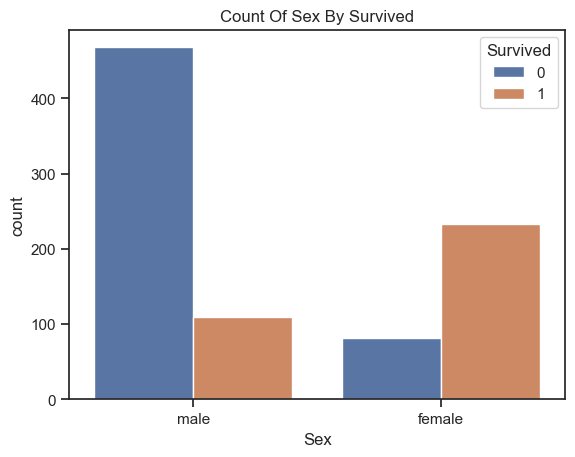

,Survived
Sex,
female,0.742038
male,0.188908


In [61]:
# Sex Bar
bar("Sex")

Key Insights
- on average females had the most survived passengers

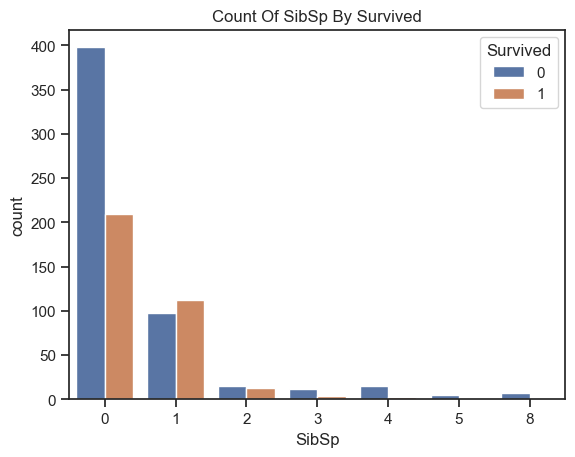

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [62]:
# Siblings Or Spouse Bar
bar("SibSp")

Key Insights
- on average 1 siblings/spouse had the most survived passengers

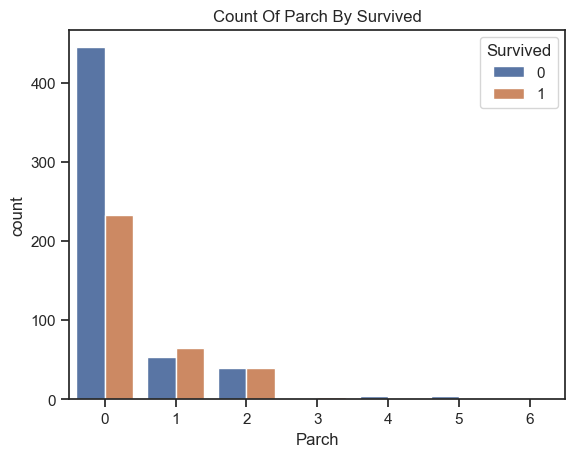

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [63]:
# Parents Or Children Bar
bar("Parch")

Key Insights
- on average 3 parents/children had the most survived passengers

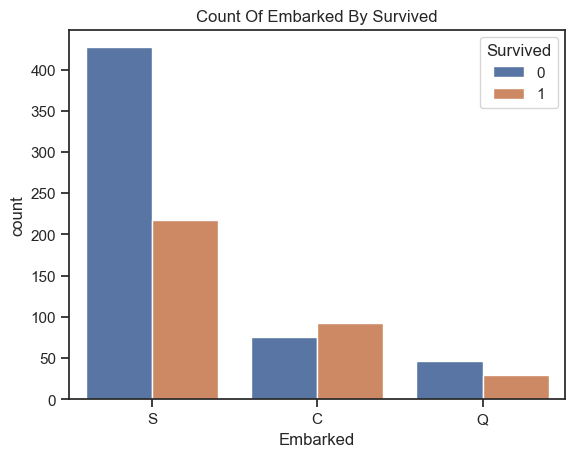

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [64]:
# Embark Bar
bar("Embarked")

Key Insights
- on average cherbourg had the most survived passengers

In [65]:
# Distribution Function
def dist(col) : 
    sns.distplot(train[col], kde = False, bins = 20)
    plt.title(f"{col} Distribution")
    return plt.show()

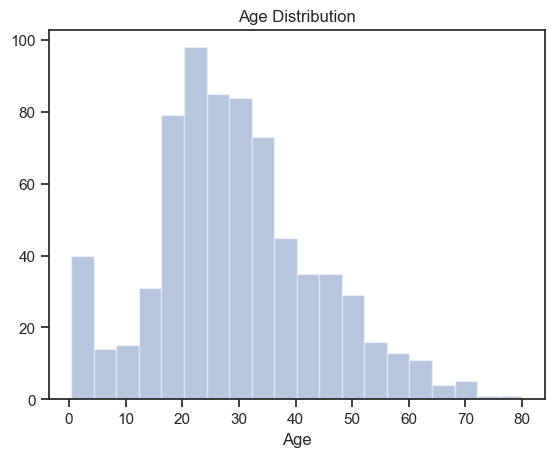

In [66]:
# Age Distribution
dist("Age")

Key Insights
- the distribution of ages has positive skewness

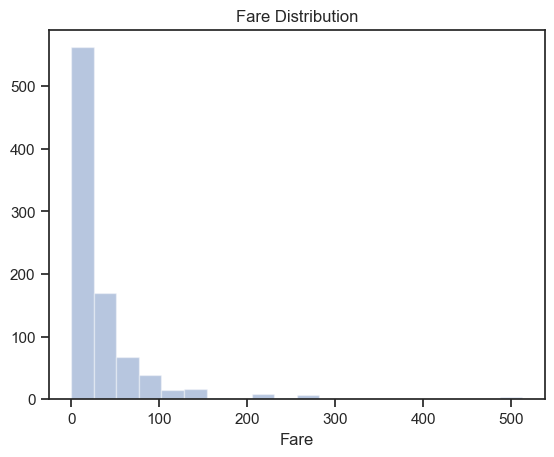

In [67]:
# Fare Distribution
dist("Fare")

Key Insights
- the distribution of fares has positive skewness

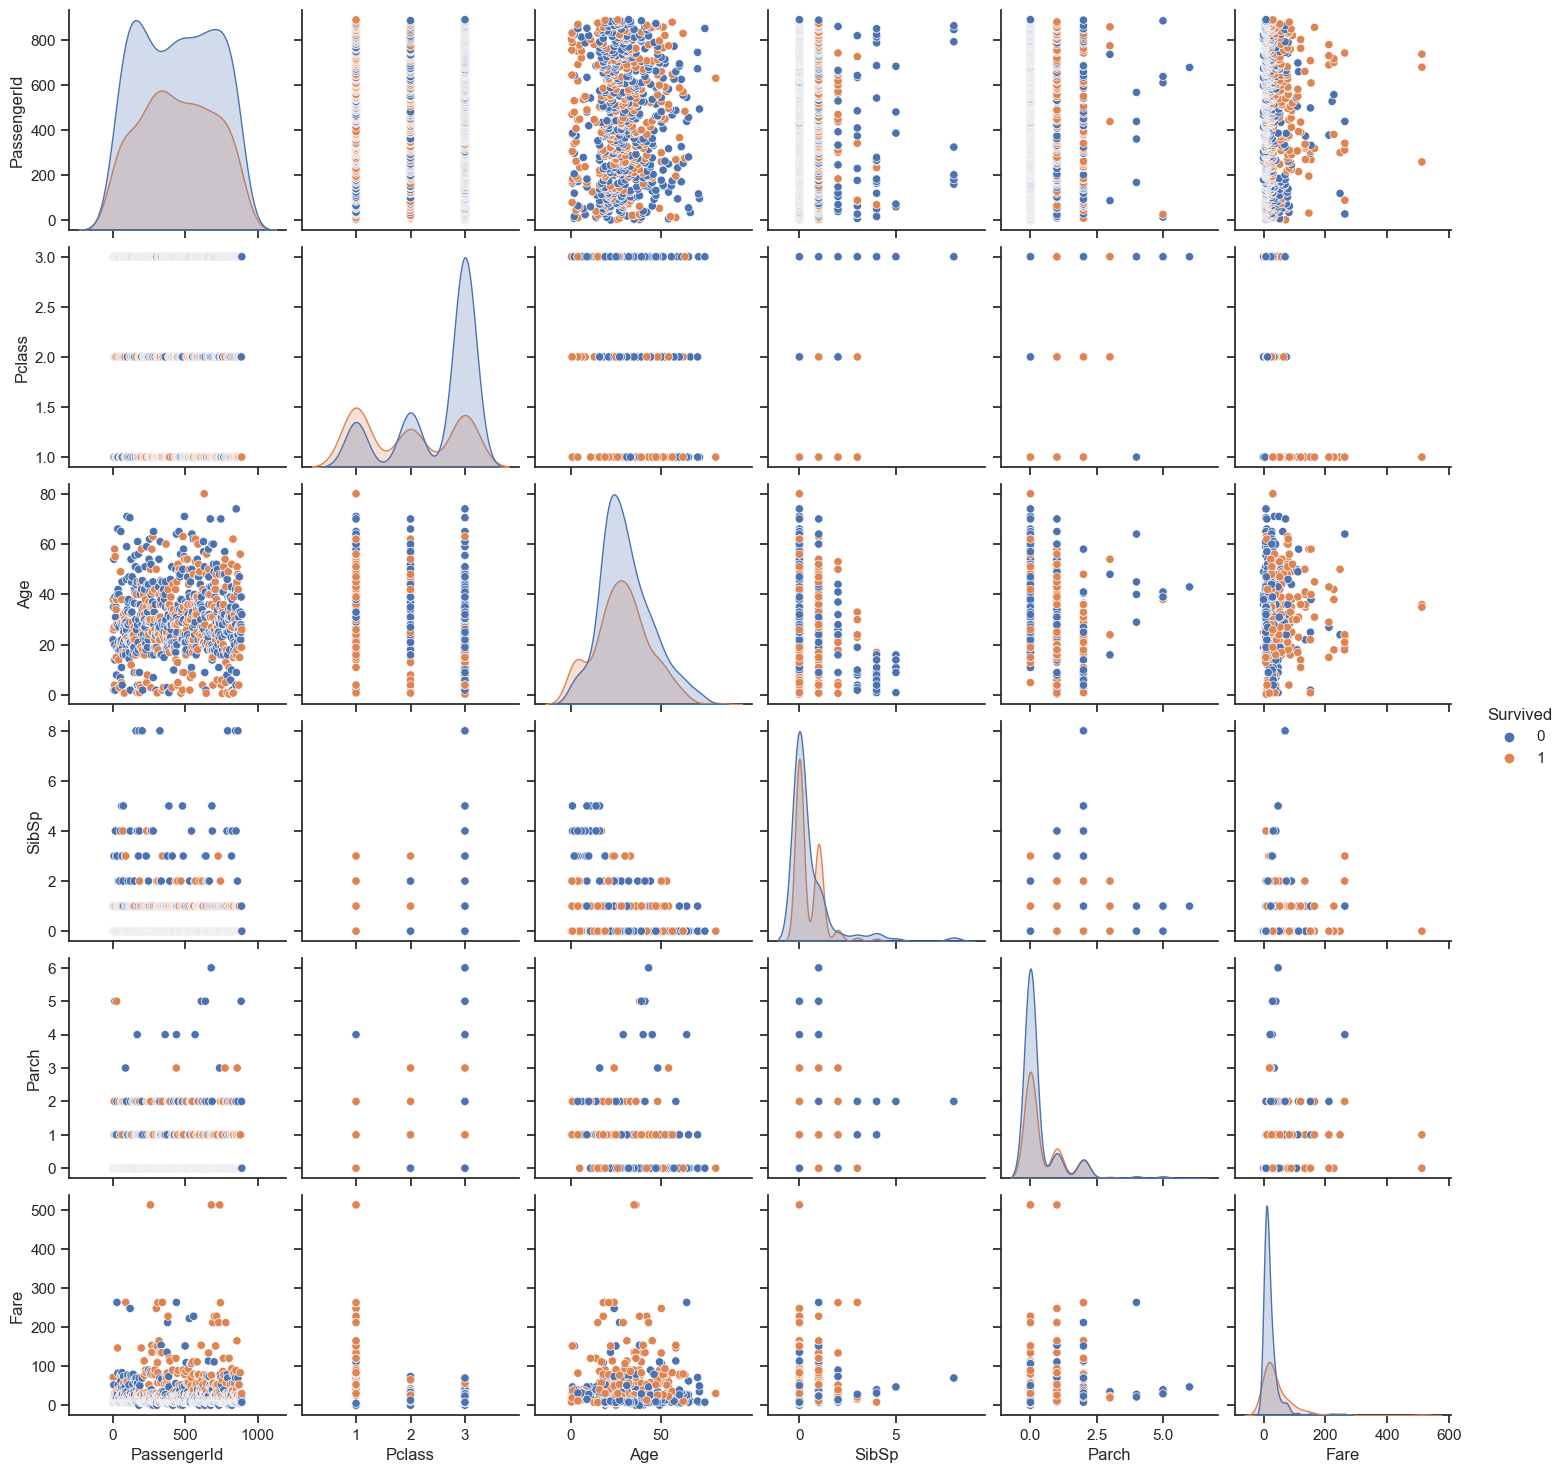

In [68]:
# Scatter
sns.set(style = "ticks")
sns.pairplot(train, hue = "Survived")
plt.show()

Key Insights
- younger passengers tend to survive more than older passengers
- wealthier passengers tend to survive more than poorer passengers

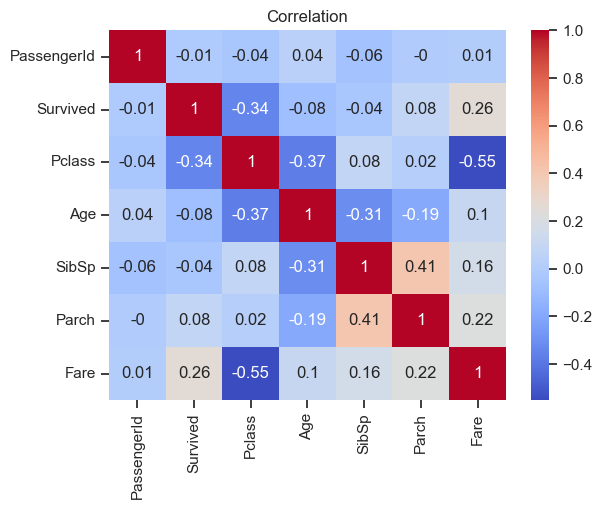

In [69]:
# Correlation
corr = train.corr().round(2)
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.title("Correlation")
plt.show()

Key Insights
- children with parents tend to survive more than children without parents
- children without siblings tend to survive more than children with siblings

# Transform

In [70]:
# Dataset List
trainTest = [train, test]

In [71]:
# Extract Title From Name
for dataset in trainTest : 
    dataset["Title"] = dataset["Name"].str.extract(" ([A-Za-z]+)\.")

In [72]:
# Title Imputation
other = ["Dr",
         "Rev",
         "Major",
         "Col",
         "Countess",
         "Capt",
         "Sir",
         "Lady",
         "Don",
         "Dona",
         "Jonkheer"]

for dataset in trainTest : 
    dataset["Title"] = dataset["Title"].replace(other, "Other") # If Title Frequency < 10 Then Other
    
    dataset["Title"] = dataset["Title"].replace({"Mlle" : "Miss",
                                                "Ms" : "Miss",
                                                "Mme" : "Mrs"})

In [73]:
# Encode Title
titleMap = {"Mr" : 1,
           "Miss" : 2,
           "Mrs" : 3,
           "Master" : 4,
           "Other" : 5}

for dataset in trainTest : 
    dataset["Title"] = dataset["Title"].map(titleMap)
    dataset["Title"] = dataset["Title"].fillna(0)

In [74]:
# Encode Sex
sexMap = {"male" : 0, "female" : 1}

for dataset in trainTest : 
    dataset["Sex"] = dataset["Sex"].map(sexMap)

In [75]:
# Age Imputation
for dataset in trainTest : 
    ageAvg = dataset["Age"].mean()
    ageStd = dataset["Age"].std()
    ageNull = dataset["Age"].isnull().sum()
    
    ageRandm = np.random.randint(ageAvg - ageStd, # Generate Random Nums Between Lower & Upper
                               ageAvg + ageStd,
                               size = ageNull)
    ageRandm = dataset["Age"][np.isnan(dataset["Age"])] # Replace Nulls With Randon Nums

train["AgeBand"] = pd.qcut(train["Age"], 5) # Five Age Bands
train.groupby("AgeBand")[["Survived"]].mean() # Avg Age Band Survival

,Survived
AgeBand,
"(0.419, 19.0]",0.481707
"(19.0, 25.0]",0.328467
"(25.0, 31.8]",0.393701
"(31.8, 41.0]",0.437500
"(41.0, 80.0]",0.373239


In [76]:
# Encode Age
ageBins = [0, 16, 32, 48, 64, np.inf]
ageLabs = [0, 1, 2, 3, 4]

for dataset in trainTest : 
    dataset["Age"] = pd.cut(dataset["Age"],
                            bins = ageBins,
                            labels = ageLabs,
                            include_lowest = True)

In [77]:
# Fare Imputation
fareMed = train["Fare"].median()

for dataset in trainTest : 
    dataset["Fare"] = dataset["Fare"].fillna(fareMed)
    
train["FareBand"] = pd.qcut(train["Fare"], 4) # Four Fare Bands
train.groupby("FareBand")[["Survived"]].mean() # Avg Fare Band Survival

,Survived
FareBand,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [78]:
# Encode Fare
fareBins = [0, 7.91, 14.45, 31, np.inf]
fareLabs = [0, 1, 2, 3]

for dataset in trainTest : 
    dataset["Fare"] = pd.cut(dataset["Fare"],
                             bins = fareBins,
                             labels = fareLabs,
                             include_lowest = True)

In [79]:
# Embark Imputation
for dataset in trainTest : 
    dataset["Embarked"] = dataset["Embarked"].fillna("S")

In [80]:
# Encode Embark
embarkMap = {"S" : 0,
           "C" : 1,
           "Q" : 2}

for dataset in trainTest : 
    dataset["Embarked"] = dataset["Embarked"].map(embarkMap)

In [81]:
# Family Size
for dataset in trainTest : 
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1 # SibSp/Parch Not Include Passenger
    
train.groupby("FamilySize")[["Survived"]].mean() # Avg Family Size Survival

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [82]:
# Alone
for dataset in trainTest : 
    dataset["Alone"] = 0
    dataset.loc[dataset["FamilySize"] == 1, "Alone"] = 1 # If Alone Then 1 Else 0
    
train.groupby("Alone")[["Survived"]].mean() # Avg Alone Survival

,Survived
Alone,
0,0.505650
1,0.303538


In [83]:
# Select Features
extra = ["Name", "SibSp", "Parch", "Ticket", "Cabin", "FamilySize"]

train = train.drop(extra, axis = 1)
train = train.drop(["PassengerId", "AgeBand", "FareBand"], axis = 1)

test = test.drop(extra, axis = 1)

In [84]:
# Split Datasets
xTrain = train.drop("Survived", axis = 1)
yTrain = train["Survived"]
xTest = test.drop("PassengerId", axis = 1).copy()

# Model

to predict Titanic passengers survival outcome with the highest accuracy, lets experiment with various machine learning models
- logistic regression
- support vector machines
- linear SVC
- k nearest neighbor
- decision tree
- random forest
- naive bayes
- perceptron
- stochastic gradient descent

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

In [86]:
# Classification Function
def clf(model) : 
    clf = model.fit(xTrain, yTrain)
    preds = clf.predict(xTest)
    acc = round(clf.score(xTrain, yTrain) * 100, 2)
    return acc

In [87]:
# Logistic Regression
logReg = clf(LogisticRegression())

# Support Vector Machine
svc = clf(SVC())

# Linear Support Vector Machine
svcLin = clf(LinearSVC())

# K Nearest Neighbors
knn = clf(KNeighborsClassifier(n_neighbors = 3))

# Decision Tree
dt = clf(DecisionTreeClassifier())

# Random Forest
rf = clf(RandomForestClassifier(n_estimators = 100))

# Naive Bayes
nb = clf(GaussianNB())

# Perceptron
ptron = clf(Perceptron(max_iter = 5, tol = None))

# Stochastic Gradient Descent
sgd = clf(SGDClassifier(max_iter = 5, tol = None))

In [88]:
# Accuracy
model = pd.DataFrame({"Model" : ["Logistic Regression",
                                 "Support Vector Machine",
                                 "Linear SVC",
                                 "KNN",
                                 "Decision Tree",
                                 "Random Forest",
                                 "Naive Bayes",
                                 "Perceptron",
                                 "Stochastic Gradient Descent"],
                      "Accuracy" : [logReg,
                                 svc,
                                 svcLin,
                                 knn,
                                 dt,
                                 rf,
                                 nb,
                                 ptron,
                                 sgd]})

model.sort_values(by = "Accuracy", ascending = False).reset_index(drop = True)

,Model,Accuracy
0,Decision Tree,87.43
1,Random Forest,87.43
2,Support Vector Machine,83.73
3,KNN,83.73
4,Perceptron,79.69
5,Logistic Regression,79.24
6,Linear SVC,78.45
7,Naive Bayes,76.99
8,Stochastic Gradient Descent,76.66


Key Insights
- decision trees and random forests both have the highest accuracy but random forest have the potential for less overfit and better generalization
- random forests randomly select subsets of features at each level of every decision tree and apply ensemble methods to get the majority vote or weighted average of predictions from several decision trees

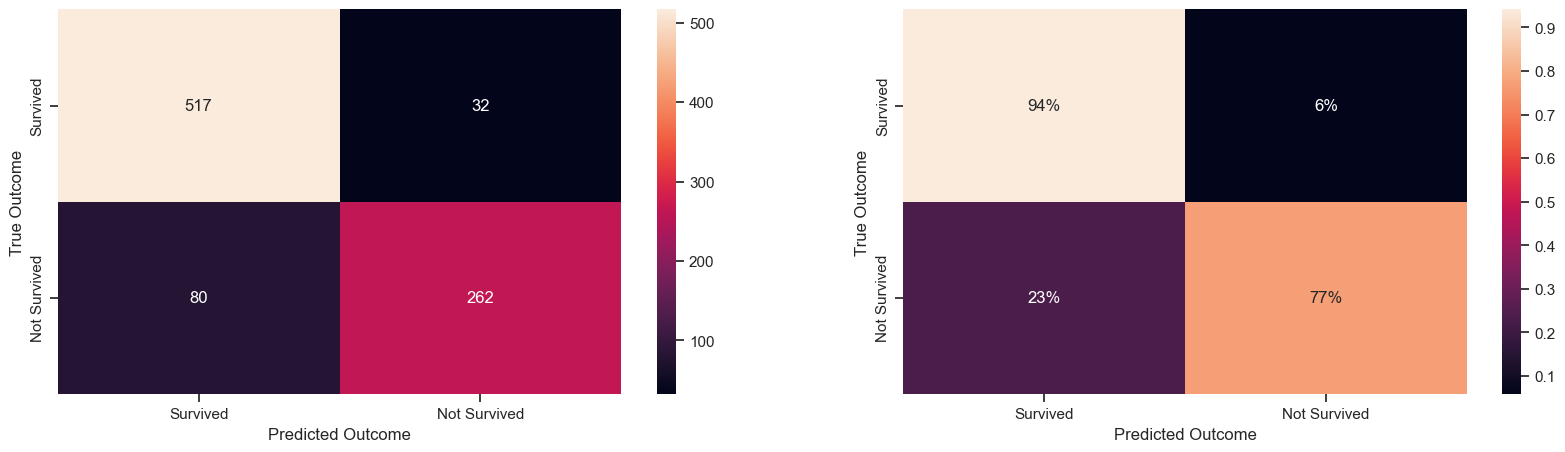

In [89]:
# Confusion Matrix
model = RandomForestClassifier(n_estimators = 100) # Random Forest
clf = model.fit(xTrain, yTrain)
preds = clf.predict(xTrain)
acc = round(clf.score(xTrain, yTrain) * 100, 2)

cnfMatrix = confusion_matrix(yTrain, preds) # Confusion Matrix
cnfMatrixPer = cnfMatrix / cnfMatrix.sum(axis = 1, keepdims = True)

predOutcome = ["Survived", "Not Survived"] # Confusion Matrix Outcomes
trueOutcome = ["Survived", "Not Survived"]

cnfDf = pd.DataFrame(cnfMatrix, index = trueOutcome, columns = predOutcome) # Matrix -> DataFrame
cnfPerDf = pd.DataFrame(cnfMatrixPer, index = trueOutcome, columns = predOutcome)

fig, ax = plt.subplots(1, 2, figsize = (20, 5)) # Plot Confusion Matrix
sns.heatmap(cnfDf, annot = True, fmt = "d", ax = ax[0])
sns.heatmap(cnfPerDf, annot = True, fmt = "0.0%", ax = ax[1])
for axis in ax : 
    axis.set(xlabel = "Predicted Outcome", ylabel = "True Outcome")
plt.show()

Key Insights
- the random forest correctly predicted the survived outcome of Titanic passengers by 93%
- the random forest incorrectly predicted the survived outcome of Titanic passengers by 22%
- the random forest correctly predicted the not survived outcome of Titanic passengers by 78%
- the random forest incorrectly predicted the not survived outcome of Titanic passengers by 7%

In [90]:
# Submission
model = RandomForestClassifier(n_estimators = 100)
clf = model.fit(xTrain, yTrain)
preds = clf.predict(xTest)
acc = round(clf.score(xTrain, yTrain) * 100, 2)

submission = pd.DataFrame({"PassengerId" : test["PassengerId"],
                           "Survived" : preds})
submission.to_csv("/Users/tgut03/Jupyter/Data/Titanic Predictions.csv", index = False)

# Conclusion
To conclude, my model accurately predicted the survival outcome of Titanic passengers by 87.43%.